In [72]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [73]:
#defining factors
RATIO_MEN=[0.5,0.65,0.8,0.95] 
PROB_MEN=[0.05,0.20,0.35,0.5,0.65,0.8,0.95]
DIFF_PROB=[-0.45,-0.30,-0.15,0,0.15,0.30,0.45]
STD_ABILITY1=4
STD_ABILITY2=3
MEANS={'0.05':[20.88,10.88], '0.20':[22.9,12.9], '0.35':[24.035,14.035], '0.50':[25,15], '0.65':[25.965,15.965], '0.80':[27.1,17.1], '0.95':[29.12,19.12]}
STD_NOISE=2.5
NUMBER_DATASETS=550
n=1000

In [74]:
def createSample(sex, prob_men, diff_prob):
    if sex=='M':
        height=random.gauss(178.4,7.6)
        ability1=random.gauss(MEANS[format(prob_men,'.2f')][0],STD_ABILITY1)
        ability2=random.gauss(MEANS[format(prob_men,'.2f')][1],STD_ABILITY2)
        ability1_noise=ability1+random.gauss(0,STD_NOISE)
        ability2_noise=ability2+random.gauss(0,STD_NOISE)
    else:
        height=random.gauss(164.7,7.1)
        ability1=random.gauss(MEANS[format(prob_men+diff_prob, '.2f')][0],STD_ABILITY1)
        ability2=random.gauss(MEANS[format(prob_men+diff_prob, '.2f')][1],STD_ABILITY2)
        ability1_noise=ability1+random.gauss(0,STD_NOISE)
        ability2_noise=ability2+random.gauss(0,STD_NOISE)
    
    
    abilitySum_noise = ability1_noise + ability2_noise
    if ability1 + ability2 >=40:
        label=1
    else:
        label=0
    
       
    sample=[sex, height, ability1_noise, ability2_noise, abilitySum_noise , label]
    return sample

In [75]:
def createDataFrame(prob_men, diff_prob, ratio_men):
    sampleList = []
    data = []

    for i in range(0,int(n*ratio_men)):
        sampleList.append(createSample('M', prob_men, diff_prob))
    for i in range(0,int(n*(1-ratio_men))):
        sampleList.append(createSample('F', prob_men, diff_prob))
    
    dataSet = pd.DataFrame(sampleList, columns=['Sex', 'Height', 'Ability 1', 'Ability 2', 'Ability Sum', 'Label'])
    dataSet['Sex']= dataSet['Sex'].map({'M':0,'F':1})
    dataSet_M = dataSet.query('Sex == 0').drop(['Sex'], axis=1)
    dataSet_W = dataSet.query('Sex == 1').drop(['Sex'], axis=1)
    
    data = [dataSet, dataSet_M, dataSet_W]
    
    return data

In [86]:
data_H1 = createDataFrame(PROB_MEN[3], DIFF_PROB[3], RATIO_MEN[2])
data_H1[0]

,Sex,Height,Ability 1,Ability 2,Ability Sum,Label
0,0,177.898166,30.840083,11.849038,42.689121,1
1,0,169.858895,31.328068,17.867149,49.195218,1
2,0,171.750179,29.239660,17.207622,46.447282,1
3,0,159.963335,32.112921,15.742251,47.855172,1
4,0,186.757587,19.943961,16.177004,36.120965,1
...,...,...,...,...,...,...
994,1,159.955844,27.319764,15.564466,42.884229,0
995,1,160.518992,26.585492,17.727771,44.313263,1
996,1,153.763749,9.000639,14.943462,23.944101,0
997,1,163.425198,24.713761,13.085882,37.799643,1


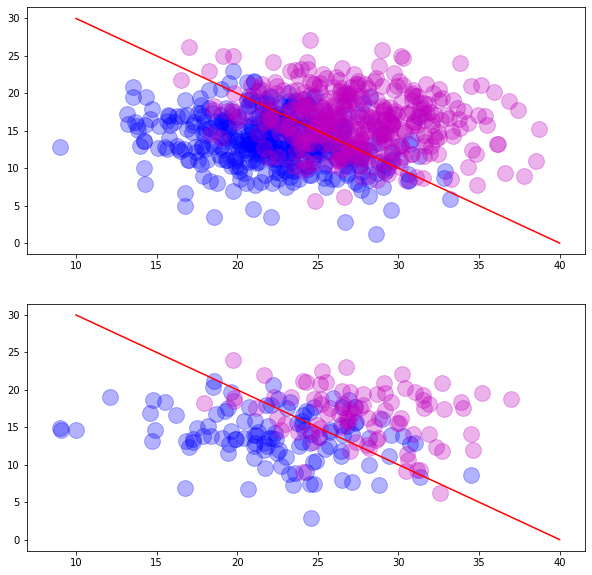

In [87]:
x_men0=data_H1[1].query('Label == 0')['Ability 1']
x_men1=data_H1[1].query('Label == 1')['Ability 1']
y_men0=data_H1[1].query('Label == 0')['Ability 2']
y_men1=data_H1[1].query('Label == 1')['Ability 2']

x_women0=data_H1[2].query('Label == 0')['Ability 1']
x_women1=data_H1[2].query('Label == 1')['Ability 1']
y_women0=data_H1[2].query('Label == 0')['Ability 2']
y_women1=data_H1[2].query('Label == 1')['Ability 2']

plt.figure(figsize=(10,10))

plt.subplot(2,1,1)
plt.plot([10,20,30,40],[30,20,10,0], c='r')
plt.scatter(x_men0, y_men0, c='b', alpha=0.3, s= 250.0)
plt.scatter(x_men1, y_men1, c='m', alpha=0.3, s=250.0)

plt.subplot(2,1,2)
plt.plot([10,20,30,40],[30,20,10,0], c='r')
plt.scatter(x_women0, y_women0, c='b', alpha=0.3, s= 250.0)
plt.scatter(x_women1, y_women1, c='m', alpha=0.3, s= 250.0)

plt.show()

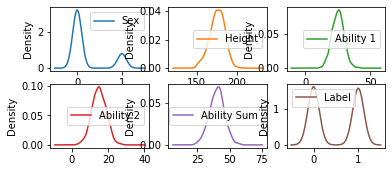

In [78]:
data_H1[0].plot(kind='density', subplots=True, layout=(3,3), sharex=False)
plt.show()

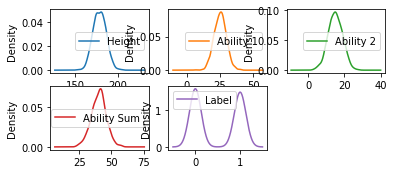

In [79]:
data_H1[1].plot(kind='density', subplots=True, layout=(3,3), sharex=False)
plt.show()

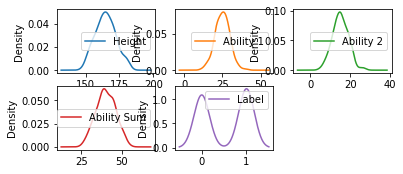

In [80]:
data_H1[2].plot(kind='density', subplots=True, layout=(3,3), sharex=False)
plt.show()